In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

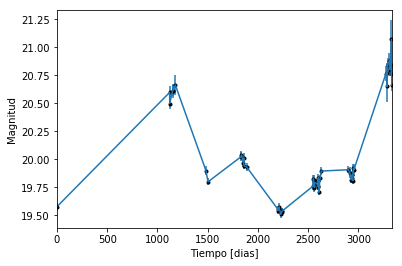

In [2]:
data = np.genfromtxt('LC_18344_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

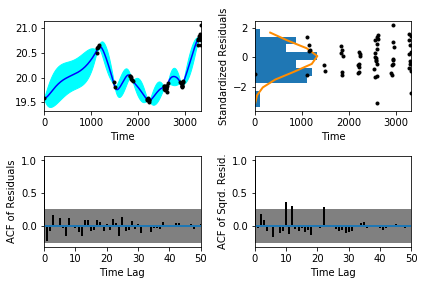

In [5]:
sample.assess_fit()

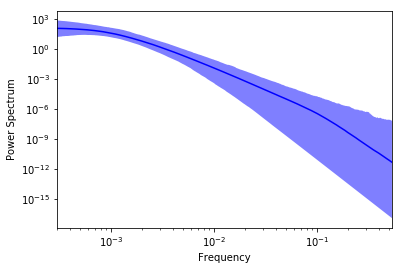

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000375271,0.213759,'Medida del nivel de ruido')

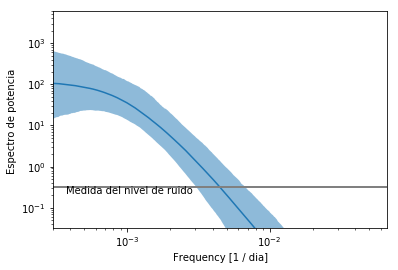

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

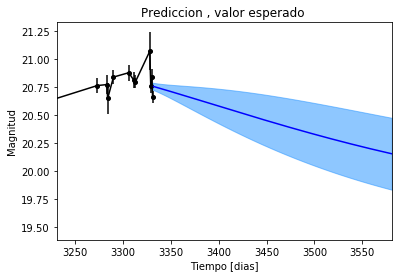

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

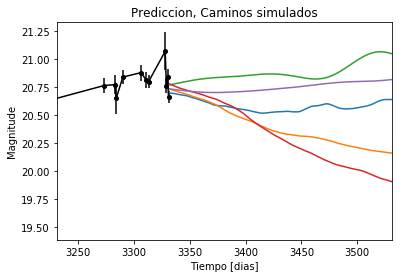

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


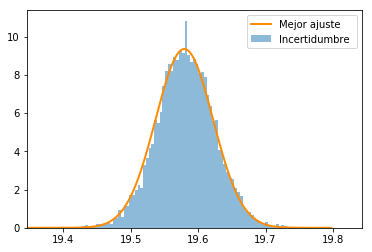

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

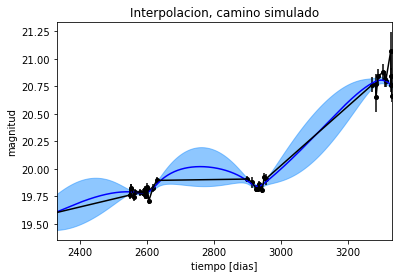

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

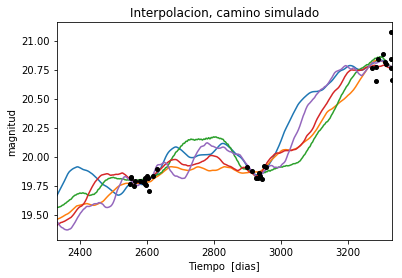

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


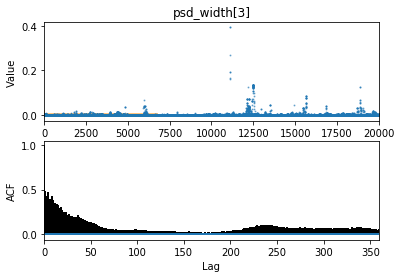

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 540.223539002
Median: 0.00777935093335
Standard deviation: 0.194761381408
68% credibility interval: [ 0.00056669  0.17665414]
95% credibility interval: [  3.29824840e-04   8.05616785e-01]
99% credibility interval: [  3.09077928e-04   9.90435877e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 487.942374396
Median: 0.00120498083448
Standard deviation: 0.0648585264327
68% credibility interval: [ 0.00042206  0.01577489]
95% credibility interval: [ 0.00031714  0.22878148]
99% credibility interval: [  3.03463161e-04   4.25617908e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 533.639993716
Median: 0.00658274608741
Standar

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 284.99713513
Median: 0.000621304314562
Standard deviation: 0.227884666527
68% credibility interval: [ 0.         0.2449085]
95% credibility interval: [ 0.          0.86857652]
99% credibility interval: [ 0.          1.02061462]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 284.99713513
Median: 0.000621304314562
Standard deviation: 0.227884666527
68% credibility interval: [ 0.         0.2449085]
95% credibility interval: [ 0.          0.86857652]
99% credibility interval: [ 0.          1.02061462]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 775.221414857
Median: 0.0
Standard deviation: 0.000351589880899
68% cred

Plotting parameter summary


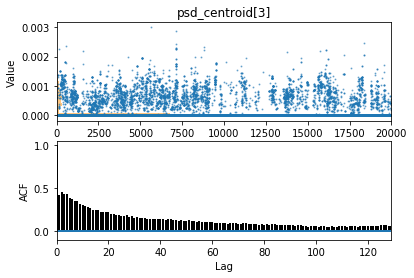

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 847.75476664
Median: 92.6146599874
Standard deviation: 1.64189105391
68% credibility interval: [ 90.77106216  93.77646815]
95% credibility interval: [ 88.28900862  94.59517166]
99% credibility interval: [ 86.13369531  95.02370214]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 542.77670789
Median: 0.537923585709
Standard deviation: 1.96008941829
68% credibility interval: [ 0.04929264  3.43856037]
95% credibility interval: [ 0.01495697  6.51669706]
99% credibility interval: [ 0.01043107  8.70760279]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 596.739837224
Median: 0.114183105571
Standard deviation: 7.8145847665
68% credibility interval: [ 0.00573511  4.85149862]
95% credibility interval: [  5.74421756e-04 

Plotting parameter summary


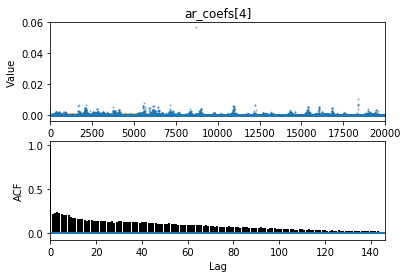

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10163.9312289
Median: 5.37458758361e-14
Standard deviation: 7.03096257999e+63
68% credibility interval: [  4.15385830e-56   8.69084412e+22]
95% credibility interval: [  1.50719495e-79   1.22764280e+55]
99% credibility interval: [  3.44168713e-85   3.15482131e+64]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3201.28458949
Median: 20.0156394251
Standard deviation: 0.23918215617
68% credibility interval: [ 19.83257802  20.20055696]
95% credibility interval: [ 19.52877106  20.49438069]
99% credibility interval: [ 19.23947167  20.83631405]


Plotting parameter summary


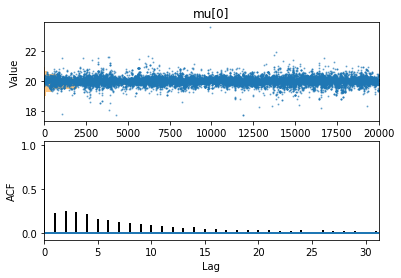

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

Plotting parameter summary


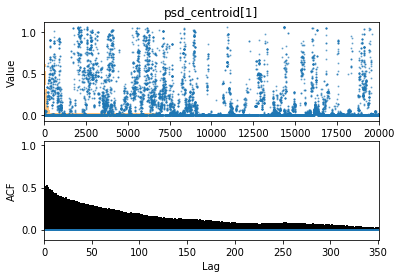

In [32]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [33]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 847.75476664
Median: 92.6146599874
Standard deviation: 1.64189105391
68% credibility interval: [ 90.77106216  93.77646815]
95% credibility interval: [ 88.28900862  94.59517166]
99% credibility interval: [ 86.13369531  95.02370214]


Plotting parameter summary


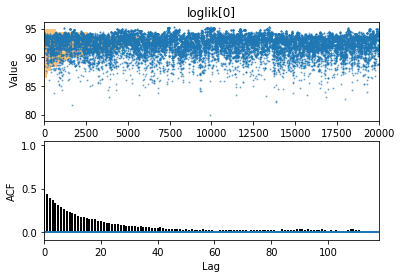

In [35]:
sample.plot_parameter('loglik', 0, doShow=True)

In [36]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [37]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3533.81296326
Median: 0.221103491588
Standard deviation: 0.283364977801
68% credibility interval: [ 0.12918066  0.41934262]
95% credibility interval: [ 0.08251053  0.91003916]
99% credibility interval: [ 0.06389841  1.78632163]


Plotting parameter summary


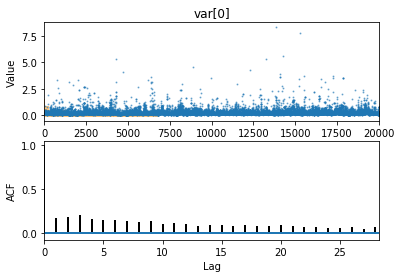

In [38]:
sample.plot_parameter('var', 0, doShow=True)

In [39]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [40]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1975.20834445
Median: 1.06708345162
Standard deviation: 0.169612436387
68% credibility interval: [ 0.90983245  1.24251039]
95% credibility interval: [ 0.7838863   1.45028875]
99% credibility interval: [ 0.72679117  1.59734657]


Plotting parameter summary


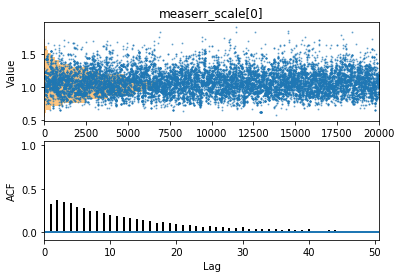

In [41]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [42]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [43]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 652.939503421
Median: 4.67528283702e-05
Standard deviation: 0.00665972523009
68% credibility interval: [  7.06423083e-28   2.37009987e-03]
95% credibility interval: [  1.32260168e-58   1.65103622e-02]
99% credibility interval: [  1.37185190e-68   3.07874886e-02]


Plotting parameter summary


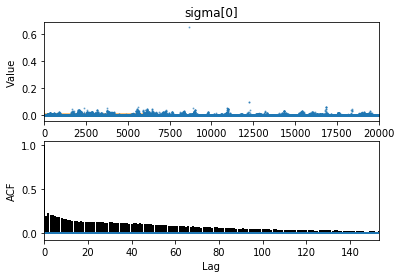

In [44]:
sample.plot_parameter('sigma', 0, doShow=True)

In [45]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [46]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 540.223539002
Median: (-0.0488791034838-0.962153991484j)
Standard deviation: 1.88352475449
68% credibility interval: [-1.10995070-0.77502614j -0.00356063-0.00512145j]
95% credibility interval: [ -5.06183955e+00+0.j          -2.07235059e-03-0.00152253j]
99% credibility interval: [ -6.22309215e+00+0.j          -1.94199390e-03-0.01270459j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 487.942374396
Median: (-0.00757111787464+0.151753657067j)
Standard deviation: 1.48870459431
68% credibility interval: [-0.09911654 +6.07120278e+00j -0.00265185 +4.27073307e-03j]
95% credibility interval: [-1.43747642 +3.16714414e+00j -0.00199267 +3.14084882e-03j]
99% credibility interval: [ -2.67423618e+00 +4.44360949e+00j  -1.90671528e-03